### Quasi Monte Carlo

In [12]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

### Van Der Corput

In [13]:
def van_der_corput(n, base=2):
    """Generate the n-th Van der Corput number in a given base."""
    vdc, denom = 0, 1
    while n > 0:
        n, remainder = divmod(n, base)
        denom *= base
        vdc += remainder / denom
    return vdc

### Halton 

In [14]:
def halton_sequence(size, dim):
    """Generate a Halton sequence of given size and dimension."""
    primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
    seq = np.array([[van_der_corput(i, base=primes[j]) for j in range(dim)] for i in range(size)])
    return seq

### Katakuni

In [15]:

def kakutani_sequence(size, dim):
    """Generate a Kakutani sequence with specified size and dimension."""
    seq = np.zeros((size, dim))
    
    # Angles for pseudo-addition
    angles = [1 / (i + 2) for i in range(dim)]
    
    # Starting values
    start_values = [1/5] + [(2 * np.pi - 1 - (i + 2)**2 + 4 * i) / 3 for i in range(2, dim)]
    
    # Iterative generation
    seq[0] = start_values
    for i in range(1, size):
        seq[i] = (seq[i-1] + angles) % 1
    
    return seq

### Faure

In [16]:
def faure_sequence(size, dim):
    """Generate a Faure sequence with specified size and dimension."""
    seq = np.zeros((size, dim))
    for d in range(dim):
        base = d + 2
        for n in range(size):
            seq[n, d] = van_der_corput(n, base)
    return seq


### Tests , et comparaisons 

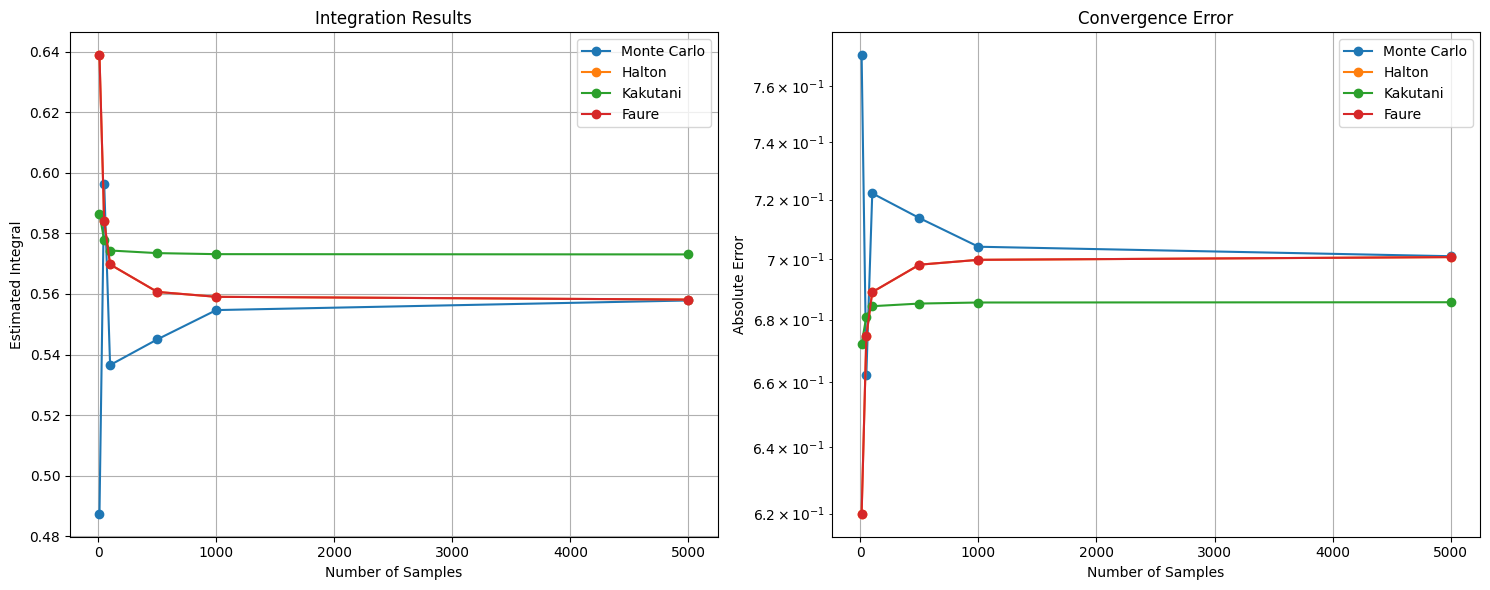

In [17]:
def monte_carlo_integration(func, samples):
    """Perform classic Monte Carlo integration."""
    return np.mean(func(samples))

def quasi_monte_carlo_integration(func, seq):
    """Perform quasi-Monte Carlo integration using a sequence."""
    return np.mean(func(seq))

def test_convergence():
    """Test convergence speed and accuracy of different methods."""
    # Analytic solution for the test function
    true_value = np.sqrt(np.pi) * (erf(1) ** 2)
    
    # Function to integrate: exp(-x^2 - y^2)
    func = lambda x: np.exp(-np.sum(x**2, axis=1))
    
    # Number of samples to test
    sample_sizes = [10, 50, 100, 500, 1000, 5000]
    dimensions = 2
    
    # Prepare sequences and methods
    results = {
        "Monte Carlo": [],
        "Halton": [],
        "Kakutani": [],
        "Faure": []
    }
    errors = {method: [] for method in results.keys()}
    
    for size in sample_sizes:
        # Monte Carlo samples
        mc_samples = np.random.uniform(0, 1, (size, dimensions))
        mc_result = monte_carlo_integration(func, mc_samples)
        results["Monte Carlo"].append(mc_result)
        errors["Monte Carlo"].append(abs(mc_result - true_value))
        
        # Halton sequence
        halton_seq = halton_sequence(size, dimensions)
        halton_result = quasi_monte_carlo_integration(func, halton_seq)
        results["Halton"].append(halton_result)
        errors["Halton"].append(abs(halton_result - true_value))
        
        # Kakutani sequence
        kakutani_seq = kakutani_sequence(size, dimensions)
        kakutani_result = quasi_monte_carlo_integration(func, kakutani_seq)
        results["Kakutani"].append(kakutani_result)
        errors["Kakutani"].append(abs(kakutani_result - true_value))
        
        # Faure sequence
        faure_seq = faure_sequence(size, dimensions)
        faure_result = quasi_monte_carlo_integration(func, faure_seq)
        results["Faure"].append(faure_result)
        errors["Faure"].append(abs(faure_result - true_value))
    
    # Create two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot estimated integral values
    for method, values in results.items():
        ax1.plot(sample_sizes, values, label=method, marker='o')
    ax1.set_xlabel("Number of Samples")
    ax1.set_ylabel("Estimated Integral")
    ax1.set_title("Integration Results")
    ax1.legend()
    ax1.grid(True)
    
    # Plot absolute errors
    for method, error_values in errors.items():
        ax2.plot(sample_sizes, error_values, label=method, marker='o')
    ax2.set_xlabel("Number of Samples")
    ax2.set_ylabel("Absolute Error")
    ax2.set_title("Convergence Error")
    ax2.set_yscale('log')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Importing error function for true value calculation
from scipy.special import erf

# Run the convergence test
test_convergence()